# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [9]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep="\t")

### Step 4. See the first 10 entries

In [29]:
print(chipo.info())
chipo.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

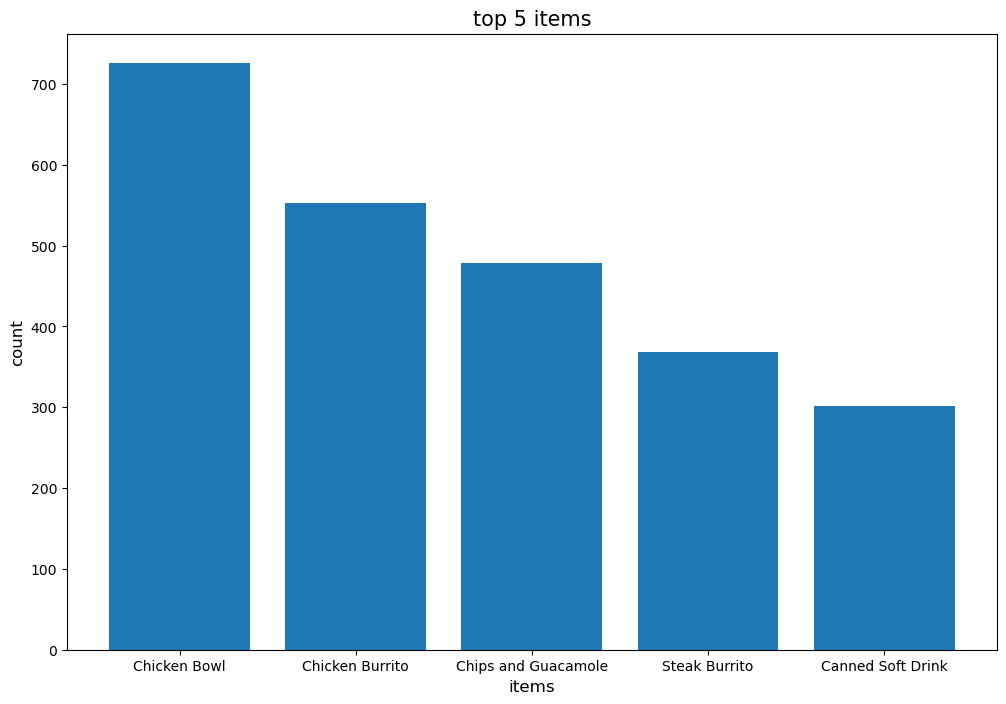

In [31]:
top_5_item = chipo['item_name'].value_counts().head(5)
## nlargest(5) 라는 함수가 있다!! 

plt.figure(figsize=(12,8))
plt.bar(top_5_item.index, top_5_item.values)

plt.xlabel("items", fontsize=12)
plt.ylabel("count", fontsize=12)
plt.title("top 5 items", fontsize=15)
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

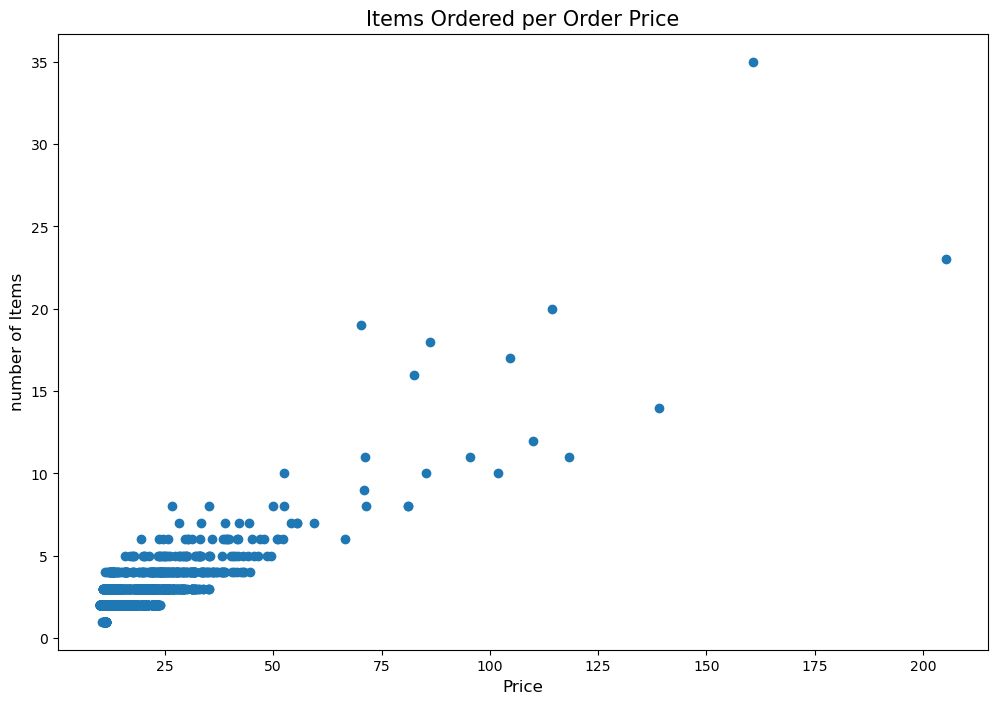

In [26]:
#금액 숫자로 바꾸기 
chipi['item_price'] = chipi['item_price'].apply(lambda x: float(x.replace('$', '')))
## replace ('[\$]', '', regex=True).astype(float) 라는 내용으로 사용! 

#ID별 주문 건수 계산 
orders = chipi.groupby('order_id').agg({'item_price': 'sum', 'quantity': 'sum'}).reset_index()

plt.figure(figsize=(12,8))
plt.scatter(orders['item_price'], orders['quantity'])

plt.xlabel("Price", fontsize=12)
plt.ylabel("number of Items", fontsize=12)
plt.title("Items Ordered per Order Price", fontsize=15)
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [ ]:
## 각 아이템 별로 총 수익을 계산해서 그래프 출력 !! 